In [66]:
# Packages for processing
import pandas as ps
import numpy as ny
from sklearn import svm

# Packages for plotting
import matplotlib.pyplot as mplt
import seaborn as sb; sb.set(font_scale=1.2)

# Allows charts in the notebook
%matplotlib inline

In [67]:
# Read cake and pastry ingredients data from the file
recipe = ps.read_excel('Recipes.xlsx')
#display the data in the notebook
recipe

,Type,Refined Flour,Milk,Powdered Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Cake,55,28,3,7,5,2,0,0
1,Cake,47,24,12,6,9,1,0,0
2,Cake,47,23,18,6,4,1,0,0
3,Cake,45,11,17,17,8,1,0,0
4,Cake,50,25,12,6,5,2,1,0
5,Cake,55,27,3,7,5,2,1,0
6,Cake,54,27,7,5,5,2,0,0
7,Cake,47,26,10,10,4,1,0,0
8,Cake,50,17,17,8,6,1,0,0
9,Cake,50,17,17,11,4,1,0,0


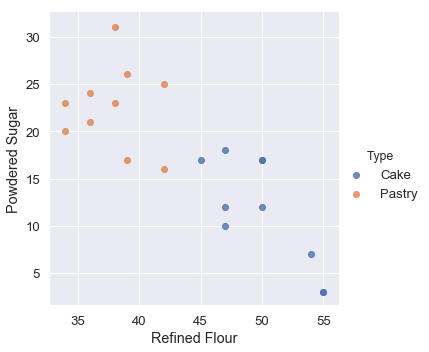

In [68]:
# Plot the two ingredients selected as features
sb.lmplot('Refined Flour', 'Powdered Sugar', data=recipe, hue='Type', fit_reg=False);

In [69]:
# Inputs for the model
contents = recipe[['Refined Flour', 'Powdered Sugar']].values
labeltype = ny.where(recipe['Type']=='Cake', 0, 1)

# names of the Features
view_features = recipe.columns.values[1:].tolist()
view_features

['Refined Flour',
 'Milk',
 'Powdered Sugar',
 'Butter',
 'Egg',
 'Baking Powder',
 'Vanilla',
 'Salt']

In [70]:
# Fit the SVM model
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(contents, labeltype)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# Make the separating hyperplane
co = svmmodel.coef_[0]
h = -co[0] / co[1]
x1 = ny.linspace(30, 60)
y1 = h * x1 - (svmmodel.intercept_[0]) / co[1]

# Plot the lines parallel to the separating hyperplane which pass through the support vectors
m = svmmodel.support_vectors_[0]
yy_down = h * x1 + (m[1] - h * m[0])
m = svmmodel.support_vectors_[-1]
yy_up = h * x1 + (m[1] - h * m[0])

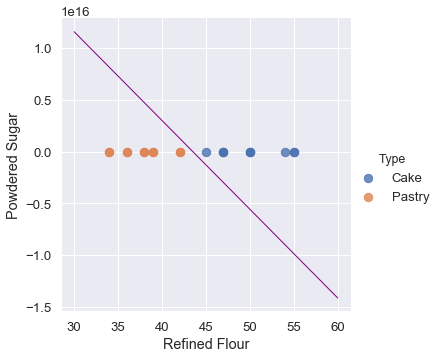

In [72]:
# Plot the hyper plane
sb.lmplot('Refined Flour', 'Powdered Sugar', data=recipe, hue='Type', fit_reg=False, scatter_kws={"s": 70})
mplt.plot(x1, y1, linewidth=1, color='purple');

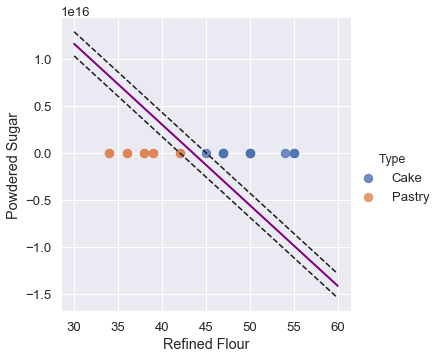

In [73]:
# Display the margins and support vectors
sb.lmplot('Refined Flour', 'Powdered Sugar', data=recipe, hue='Type', fit_reg=False, scatter_kws={"s": 70})
mplt.plot(x1, y1, linewidth=2, color='purple')
mplt.plot(x1, yy_down, 'k--')
mplt.plot(x1, yy_up, 'k--')
mplt.scatter(svmmodel.support_vectors_[:, 0], svmmodel.support_vectors_[:, 1], s=80, facecolors='none');

In [74]:
# Define a function to predict if a recipe is a cake or a pastry
def cake_or_pastry(refined_flour, powderedsugar):
    if(svmmodel.predict([[refined_flour, powderedsugar]]))==0:
        print('You\'re looking at a cake recipe!')
    else:
        print('You\'re looking at a pastry recipe!')

In [75]:
# Identify the recipe if 55 parts flour and 25 parts sugar
cake_or_pastry(55, 25)

You're looking at a cake recipe!


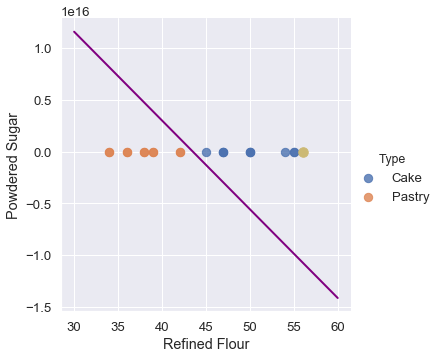

In [76]:
# Plot the above point to see where it lies
sb.lmplot('Refined Flour', 'Powdered Sugar', data=recipe, hue='Type', fit_reg=False, scatter_kws={"s": 70})
mplt.plot(x1, y1, linewidth=2, color='purple')
mplt.plot(56, 25, 'yo', markersize='9.5');

In [77]:
# Identify the recipe if 35 parts flour and 20 parts sugar
cake_or_pastry(35,20)

You're looking at a pastry recipe!
